# Name:- Yash Bhargava
# Section:- T(53)
# University RollNo:- 2115500160

importing the required modules.

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.metrics import r2_score,explained_variance_score, mean_squared_error

reading the csv file

In [188]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [189]:
df=pd.read_csv("/content/drive/MyDrive/covid_19_india.csv",parse_dates=["Date"],dayfirst=False)

In [190]:
df


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


using head to get first n rows.

In [191]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


using tail to get last n rows.

In [192]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999


Statistical Information about data

In [193]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


The info() method prints information about the DataFrame.

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       18110 non-null  int64         
 1   Date                      18110 non-null  datetime64[ns]
 2   Time                      18110 non-null  object        
 3   State/UnionTerritory      18110 non-null  object        
 4   ConfirmedIndianNational   18110 non-null  object        
 5   ConfirmedForeignNational  18110 non-null  object        
 6   Cured                     18110 non-null  int64         
 7   Deaths                    18110 non-null  int64         
 8   Confirmed                 18110 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.2+ MB


In [195]:
df=df[["Date","State/UnionTerritory","Cured","Deaths","Confirmed"]]

using the head function to get first n rows.


In [196]:
df.head(50)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
5,2020-02-04,Kerala,0,0,3
6,2020-02-05,Kerala,0,0,3
7,2020-02-06,Kerala,0,0,3
8,2020-02-07,Kerala,0,0,3
9,2020-02-08,Kerala,0,0,3


In [197]:
df.columns=["date","state","cured","deaths","confirmed"]

using the tail function to get last n rows.

In [198]:
df.tail()

,date,state,cured,deaths,confirmed
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999


storing date "2020-07-17" in variable today.

In [199]:
today = df[df.date == "2020-07-17"]
today.head()

,date,state,cured,deaths,confirmed
4179,2020-07-17,Andaman and Nicobar Islands,133,0,180
4180,2020-07-17,Andhra Pradesh,19393,492,38044
4181,2020-07-17,Arunachal Pradesh,153,3,543
4182,2020-07-17,Assam,12888,48,19754
4183,2020-07-17,Bihar,14018,197,21764


storing sorted values of the column confirmed in descending order in variable sort_today.

In [200]:
sort_today = today.sort_values(by = "confirmed",ascending=False)
sort_today.head()

,date,state,cured,deaths,confirmed
4198,2020-07-17,Maharashtra,158140,11194,284281
4208,2020-07-17,Tamil Nadu,107416,2236,156369
4187,2020-07-17,Delhi,97693,3545,118645
4194,2020-07-17,Karnataka,19729,1032,51422
4189,2020-07-17,Gujarat,32103,2089,45481


In [201]:
sort_today_top = sort_today[0:5]

In [202]:
sort_today_top

,date,state,cured,deaths,confirmed
4198,2020-07-17,Maharashtra,158140,11194,284281
4208,2020-07-17,Tamil Nadu,107416,2236,156369
4187,2020-07-17,Delhi,97693,3545,118645
4194,2020-07-17,Karnataka,19729,1032,51422
4189,2020-07-17,Gujarat,32103,2089,45481


Visualizing data

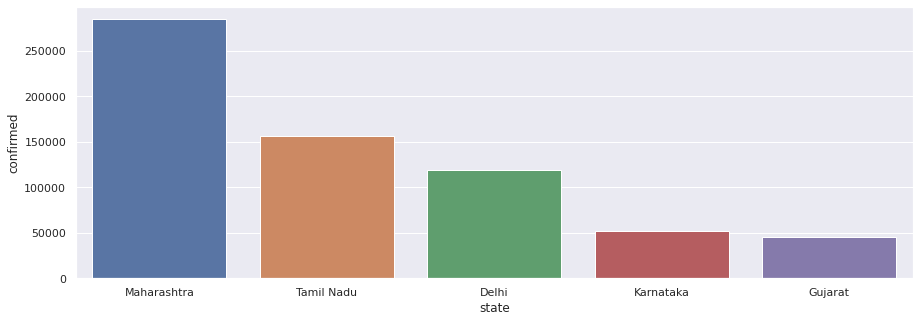

In [203]:
sns.barplot(x = "state", y = "confirmed", data = sort_today_top)
plt.show()

using sns.set() by which we can also customize seaborn theme

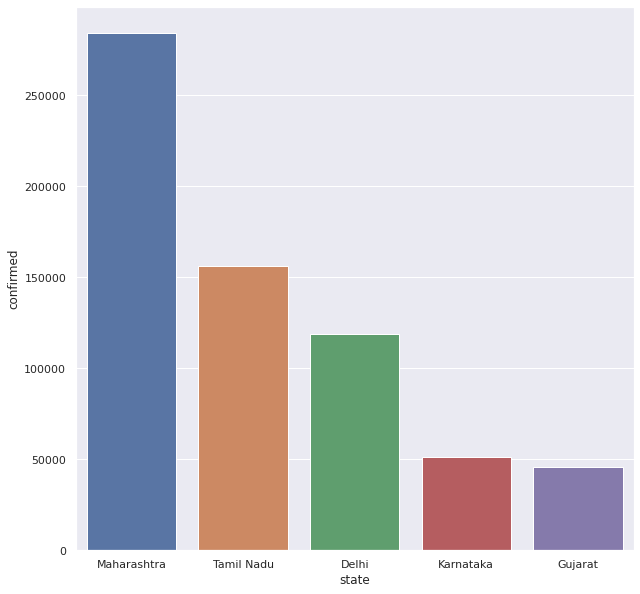

In [204]:
sns.set(rc={"figure.figsize":(10,10)})
sns.barplot(x= "state",y = "confirmed",data = sort_today_top)
plt.show()

storing sorted value based on the deaths in variable max_death_cases in descending order. 

In [205]:
max_death_cases = today.sort_values(by="deaths", ascending=False)

In [206]:
max_death_cases.head()

,date,state,cured,deaths,confirmed
4198,2020-07-17,Maharashtra,158140,11194,284281
4187,2020-07-17,Delhi,97693,3545,118645
4208,2020-07-17,Tamil Nadu,107416,2236,156369
4189,2020-07-17,Gujarat,32103,2089,45481
4212,2020-07-17,Uttar Pradesh,26675,1046,43441


In [207]:
sort_today_top_deaths=max_death_cases[0:5]

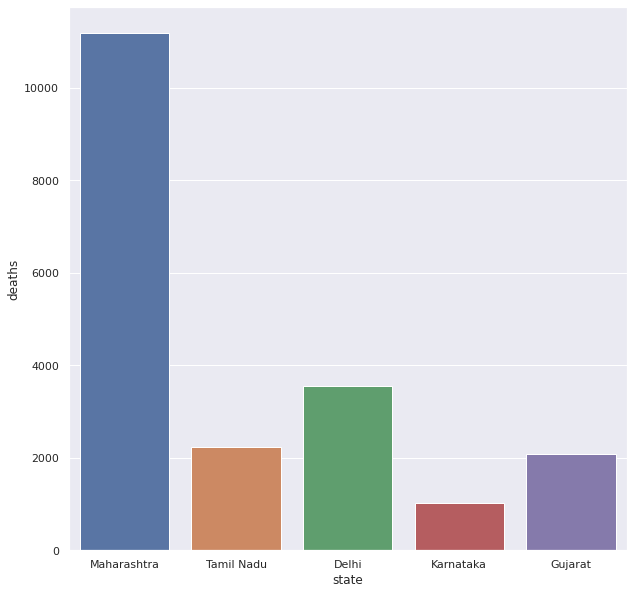

In [208]:
sns.set(rc={"figure.figsize":(10,10)})
sns.barplot(x = "state", y = "deaths", data = sort_today_top)
plt.show()

In [209]:
max_cured_cases = today.sort_values(by = "cured",ascending=False)

In [210]:
max_cured_cases.head()

,date,state,cured,deaths,confirmed
4198,2020-07-17,Maharashtra,158140,11194,284281
4208,2020-07-17,Tamil Nadu,107416,2236,156369
4187,2020-07-17,Delhi,97693,3545,118645
4189,2020-07-17,Gujarat,32103,2089,45481
4209,2020-07-17,Telengana,27295,396,41018


In [211]:
sort_top_states_cured = max_cured_cases[0:5]

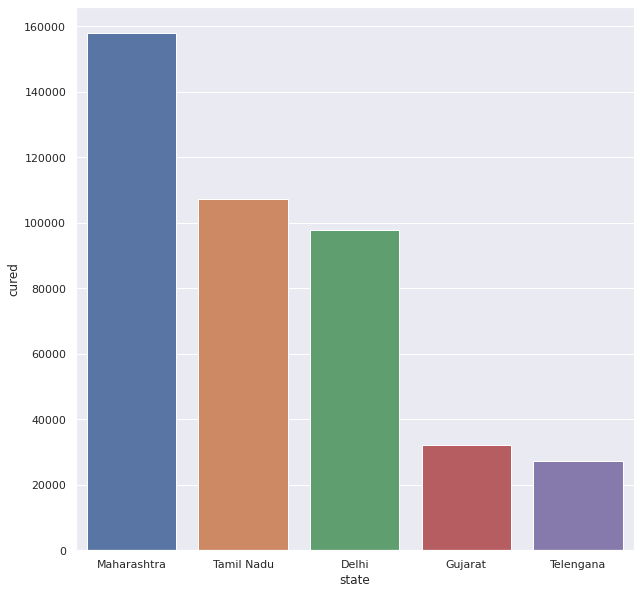

In [212]:
sns.set(rc={"figure.figsize":(10,10)})
sns.barplot(x="state",y="cured",data=sort_top_states_cured)
plt.show()

storing state maharashtra in variable.

In [213]:
maha = df[df.state=="Maharashtra"]

In [214]:
maha.head()

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14


In [215]:
maha.tail()

,date,state,cured,deaths,confirmed
17950,2021-08-07,Maharashtra,6130137,133717,6341759
17986,2021-08-08,Maharashtra,6139493,133845,6347820
18022,2021-08-09,Maharashtra,6144388,133996,6353328
18058,2021-08-10,Maharashtra,6151956,134064,6357833
18094,2021-08-11,Maharashtra,6159676,134201,6363442


making a line plot

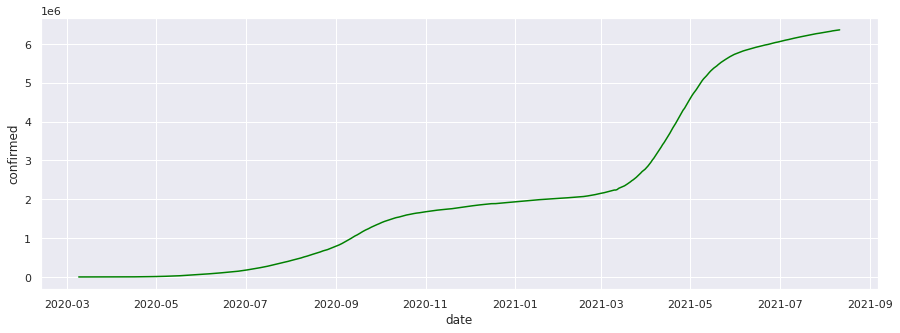

In [216]:
sns.set(rc={"figure.figsize":(15,5)})
sns.lineplot(x="date",y="confirmed",data=maha,color="green")
plt.show()

storing state kerala in variable kera.

In [217]:
kera = df[df.state=="Kerala"]

In [218]:
kera.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [219]:
kera.tail()

,date,state,cured,deaths,confirmed
17946,2021-08-07,Kerala,3317314,17515,3513551
17982,2021-08-08,Kerala,3337579,17654,3533918
18018,2021-08-09,Kerala,3357687,17747,3552525
18054,2021-08-10,Kerala,3377691,17852,3565574
18090,2021-08-11,Kerala,3396184,18004,3586693


making lineplot again.

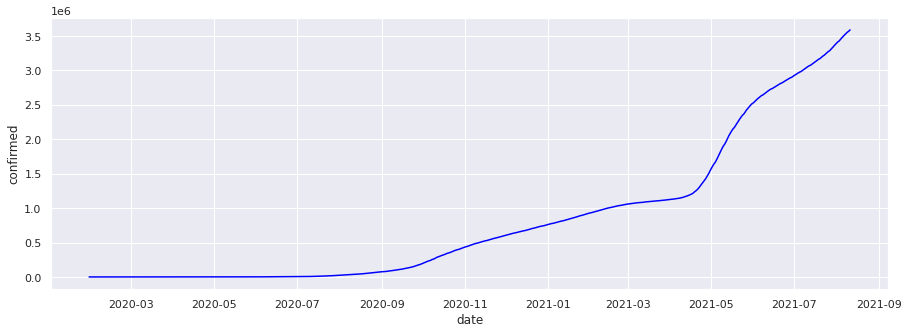

In [220]:
sns.set(rc={"figure.figsize":(15,5)})
sns.lineplot(x="date",y="confirmed",data=kera,color="blue")
plt.show()

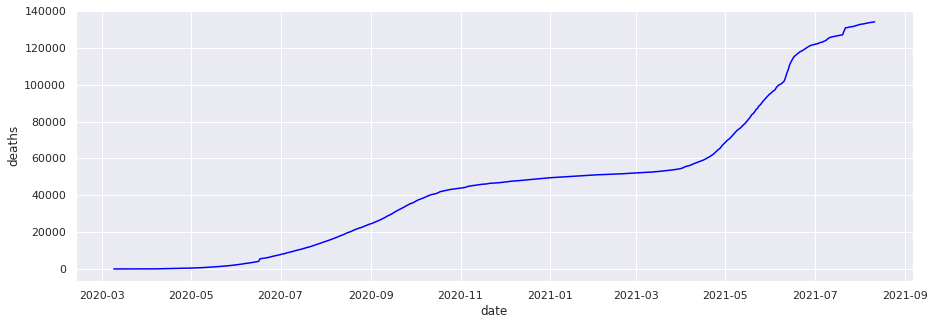

In [221]:
sns.set(rc={"figure.figsize":(15,5)})
sns.lineplot(x="date",y="deaths",data=maha,color="blue")
plt.show()

importing train_test_split from library sklearn.

In [222]:
from sklearn.model_selection import train_test_split

toordinal() is a simple method used to manipulate the objects of DateTime class. It returns proleptic Gregorian ordinal of the date.

In [223]:
maha["date"] = maha["date"].map(dt.datetime.toordinal)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [224]:
maha.head()

,date,state,cured,deaths,confirmed
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14


In [225]:
x= maha["date"]
y= maha["confirmed"]

In [226]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state = 101)

importing random forest regressor from library sklearn.ensemble.

In [227]:
from sklearn.ensemble import RandomForestRegressor

making object for RandomForestRegressor()




In [228]:
rf=RandomForestRegressor()

In [229]:
y_train

14350    4473394
8960     1820059
9742     1899352
12910    2422021
16078    5924773
          ...   
3478      152765
10750    1992683
13522    3057885
2221       44582
11506    2046287
Name: confirmed, Length: 364, dtype: int64

In [230]:
rf.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

In [231]:
rf.predict(np.array([[752652]]))

array([6360361.43])

In [232]:
y_pred=rf.predict(np.array(x_test).reshape(-1,1))
y_pred

array([2.16092739e+06, 1.70837147e+06, 1.46945537e+06, 2.18468000e+04,
       1.12483360e+05, 2.82709460e+05, 1.81060740e+06, 1.84819891e+06,
       1.89976385e+06, 1.06644223e+06, 1.32260819e+06, 2.09082250e+06,
       1.19268141e+06, 1.06270050e+05, 5.70383956e+06, 1.34835520e+05,
       1.63039520e+06, 1.03523944e+06, 7.83268390e+05, 2.11659981e+06,
       2.67396260e+05, 1.31900000e+01, 1.97930008e+06, 1.32050000e+02,
       5.97661076e+06, 6.92000000e+00, 4.36419300e+05, 6.11627930e+06,
       1.18435500e+04, 9.15778780e+05, 7.86209500e+04, 2.26276934e+06,
       2.13378258e+06, 2.53701120e+05, 6.39308500e+04, 3.15482000e+03,
       2.83652363e+06, 1.14567727e+06, 2.01316125e+06, 1.87392820e+05,
       5.94874707e+06, 2.06547439e+06, 1.87322488e+06, 1.91457912e+06,
       5.66107572e+06, 5.40766550e+06, 1.22547000e+03, 1.35183615e+06,
       5.46100000e+01, 1.23416424e+06, 1.71746640e+05, 5.28590885e+06,
       2.00660331e+06, 1.65754499e+06, 3.20423920e+06, 1.25724070e+05,
      

In [233]:
rmse=sklearn.metrics.mean_squared_error(y_test,y_pred,squared=False)
rmse

10805.93727714653

In [234]:
mse=sklearn.metrics.mean_squared_error(y_test,y_pred,squared=True)
mse

116768280.43762496

In [235]:
r2_score(y_test,y_pred)

0.9999724549433843

In [236]:
explained_variance_score(y_test,y_pred)

0.9999780955196663

Taking Date as x and deaths as y

In [237]:
x = maha['date']
y = maha['deaths']

In [238]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 101)

In [239]:
rf.fit(np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

In [240]:
y_pred = rf.predict(np.array(x_test).reshape(-1,1))

In [241]:
y_pred

array([5.2185270e+04, 4.4884600e+04, 3.8871420e+04, 8.2772000e+02,
       4.5252900e+03, 1.1094100e+04, 4.6934550e+04, 4.7672470e+04,
       4.8809920e+04, 2.9738000e+04, 3.5151840e+04, 5.1722770e+04,
       3.2408460e+04, 3.9620100e+03, 9.3388480e+04, 6.3123000e+03,
       4.2826300e+04, 2.8887040e+04, 2.4450460e+04, 5.1908820e+04,
       1.0716370e+04, 0.0000000e+00, 5.0234120e+04, 3.2600000e+00,
       1.1811595e+05, 0.0000000e+00, 1.5453460e+04, 1.2382197e+05,
       4.8946000e+02, 2.6922830e+04, 2.7769500e+03, 5.2631310e+04,
       5.2003840e+04, 1.0265990e+04, 2.1673800e+03, 1.9622000e+02,
       5.4825820e+04, 3.1376940e+04, 5.0863480e+04, 8.2344200e+03,
       1.1621187e+05, 5.1543760e+04, 4.8072290e+04, 4.9153120e+04,
       9.1839860e+04, 8.3258500e+04, 8.1510000e+01, 3.5939800e+04,
       1.2900000e+00, 3.3094550e+04, 7.6681500e+03, 7.9334160e+04,
       5.0736230e+04, 4.3514780e+04, 5.6815140e+04, 5.9343700e+03,
       2.3132080e+04, 4.1988090e+04, 5.4401650e+04, 5.2700000e

In [242]:
r2_score(y_test,y_pred)

0.9999348203628021

In [243]:
explained_variance_score(y_test,y_pred)

0.9999444282844914

In [244]:
rmse = mean_squared_error(y_test,y_pred, squared = False)

In [245]:
mse = mean_squared_error(y_test, y_pred, squared = True)

In [246]:
rmse,mse

(300.6668184347794, 90400.5357076926)

# For Kerala State

Taking date as x and confirmed as y

In [247]:
x = kera['date']
y = kera['confirmed']

Splitting of dataset into training and testing

In [248]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 101)

Creating of model with training dataset

In [249]:
rf.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

Testing of model

In [250]:
y_pred = rf.predict(np.array(x_test).reshape(-1,1))
y_pred

array([4.98461940e+05, 5.72210000e+02, 2.75770713e+06, 2.91398687e+06,
       2.78305000e+03, 2.59800000e+01, 2.00924680e+05, 7.25617400e+05,
       3.00000000e+00, 2.59143615e+06, 1.00652000e+03, 4.89513000e+03,
       3.50280300e+04, 6.57516460e+05, 5.17710370e+05, 4.64880900e+04,
       6.85300300e+05, 1.81197400e+04, 3.60629530e+05, 5.23420000e+02,
       1.02480000e+02, 6.36168780e+05, 9.29000000e+00, 3.55664237e+06,
       3.36110770e+05, 1.10377178e+06, 2.61666688e+06, 2.02738492e+06,
       2.95912421e+06, 3.00000000e+00, 1.36102112e+06, 5.80902800e+05,
       2.54496200e+04, 1.12111817e+06, 7.78028800e+05, 3.00000000e+00,
       1.23297240e+05, 1.02280940e+06, 1.03161292e+06, 2.46336000e+03,
       1.17068422e+06, 8.38351930e+05, 2.63006000e+03, 3.87865970e+05,
       4.02562870e+05, 4.02140000e+02, 9.47097430e+05, 9.03692580e+05,
       3.05254293e+06, 1.11509608e+06, 1.09118534e+06, 3.00000000e+00,
       2.89279647e+06, 1.10843401e+06, 5.04850000e+02, 4.14943580e+05,
      

# r2_score, explained_variance_score, mean_squared_error,root_mean_squared_error

In [251]:
r2_score(y_test, y_pred)

0.9999672002374197

In [252]:
explained_variance_score(y_test, y_pred)

0.9999683160061836

In [253]:
mean_squared_error(y_test, y_pred)

27305091.108750585

In [254]:
mean_squared_error(y_test, y_pred, squared = False)

5225.427361350513

Taking date as x and y deaths 

In [255]:
x = kera['date']
y = kera['deaths']

Again Splitting of data into training and testing data

In [256]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 101)

Creating model

In [257]:
rf.fit(np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

Testing model using testing data

In [258]:
y_pred = rf.predict(np.array(x_test).reshape(-1,1))

In [259]:
y_pred

array([1.754990e+03, 4.000000e+00, 1.155204e+04, 1.315384e+04,
       2.030000e+01, 0.000000e+00, 7.520300e+02, 2.900280e+03,
       0.000000e+00, 9.480750e+03, 6.730000e+00, 2.489000e+01,
       1.115500e+02, 2.555240e+03, 1.844790e+03, 1.705400e+02,
       2.716910e+03, 5.952000e+01, 1.226800e+03, 4.000000e+00,
       0.000000e+00, 2.419950e+03, 0.000000e+00, 1.779038e+04,
       1.155570e+03, 4.493410e+03, 9.739000e+03, 6.112190e+03,
       1.357143e+04, 0.000000e+00, 5.064220e+03, 2.126430e+03,
       8.076000e+01, 4.595850e+03, 3.151720e+03, 0.000000e+00,
       4.955300e+02, 4.051250e+03, 4.081760e+03, 1.911000e+01,
       4.792810e+03, 3.418920e+03, 1.974000e+01, 1.312700e+03,
       1.367250e+03, 3.000000e+00, 3.802720e+03, 3.654350e+03,
       1.451807e+04, 4.562200e+03, 4.395480e+03, 0.000000e+00,
       1.293090e+04, 4.521900e+03, 4.000000e+00, 1.418920e+03,
       1.463749e+04, 1.536500e+02, 9.621100e+02, 7.082400e+02,
       1.009076e+04, 3.888000e+01, 3.219710e+03, 1.7968

# r2_score, explained_variance_score, mean_squared_error, root_mean_squared_error

In [260]:
r2_score(y_test, y_pred)

0.9999403626586832

In [261]:
explained_variance_score(y_test, y_pred)

0.9999427981367461

In [262]:
mse = mean_squared_error(y_test, y_pred)
mse

985.7526878571356

In [263]:
rmse = mean_squared_error(y_test, y_pred, squared = False)
rmse

31.396698677681634